# Anazliza eklsploracyjna danych

In [129]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

# zmiana sposobu wyświetlania danych typu float
pd.options.display.float_format = "{:.2f}".format 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from sklearn import metrics
from sklearn import tree

In [150]:
df=pd.read_csv('data/Sleep_health_and_lifestyle_dataset.csv')
df_org=df.copy()
df.info()
df['Sleep Disorder']=df['Sleep Disorder'].apply(lambda x:'None' if pd.isna(x) else x)




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [131]:

print("liczba danych brakujacych:", df.isna().sum().sum())
print("Liczba duplikatów: ",df.duplicated().sum())

liczba danych brakujacych: 0
Liczba duplikatów:  0


In [132]:
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.10,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.20,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.20,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.90,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.90,4,30,8,Obese,140/90,85,3000,Sleep Apnea


<Axes: >

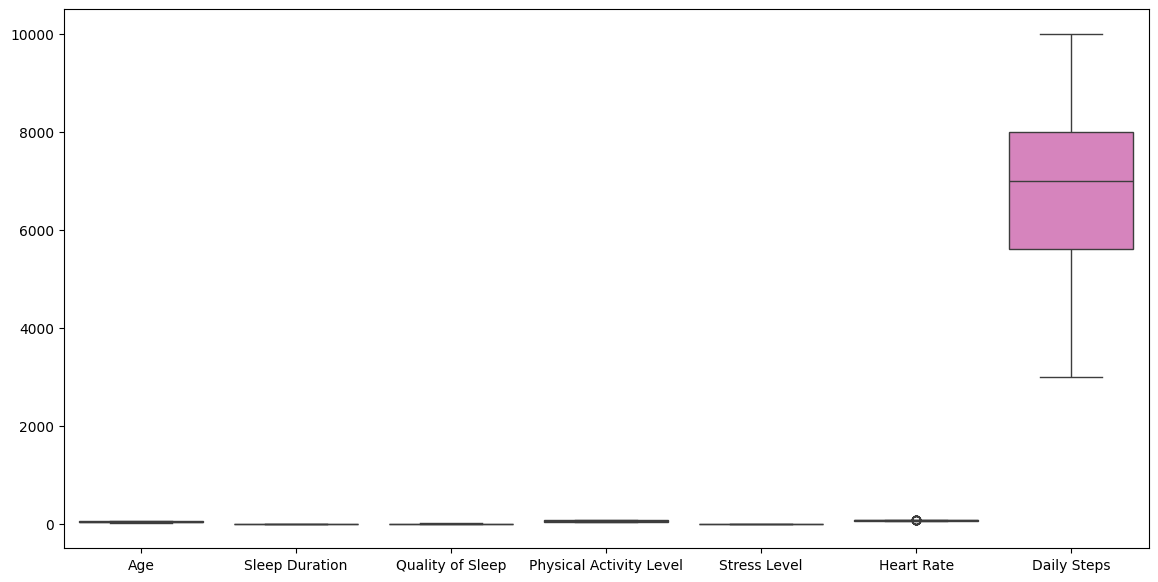

In [133]:
plt.figure(figsize = (14, 7), dpi = 100)
sns.boxplot(df.drop(columns=['Person ID',]))

Brak danych odstających

<Axes: title={'center': 'Ciśnienie krwi'}, xlabel='Skurczowe', ylabel='Rozkurczowe'>

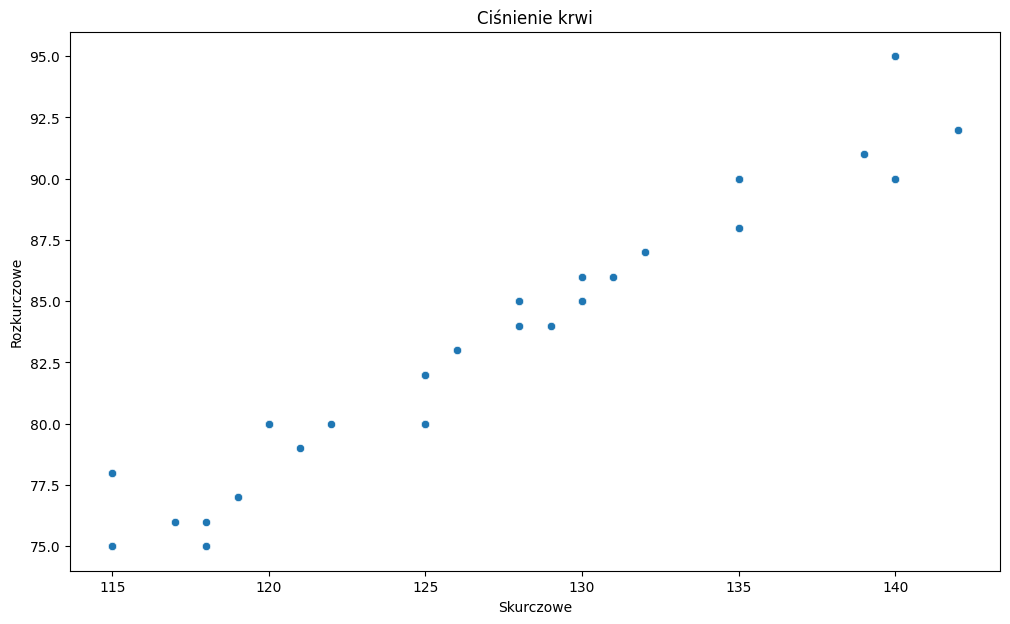

In [134]:
plt.figure(figsize = (12, 7), dpi = 100)
plt.xlabel('Skurczowe')
plt.ylabel('Rozkurczowe')

systolic=df['Blood Pressure'].apply(lambda x:int(x.split('/')[0]))
diastolic=df['Blood Pressure'].apply(lambda x:int(x.split('/')[1]))


plt.title("Ciśnienie krwi")
sns.scatterplot(x=systolic,y=diastolic)



Układ danych atrybutu ciśnienie krwi nie wskazuje na jakiekolwiek błędy- brak punktów odstających

/tmp/ipykernel_21856/966755626.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_21856/966755626.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_21856/966755626.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Rozkład tętna ze snem według płci')

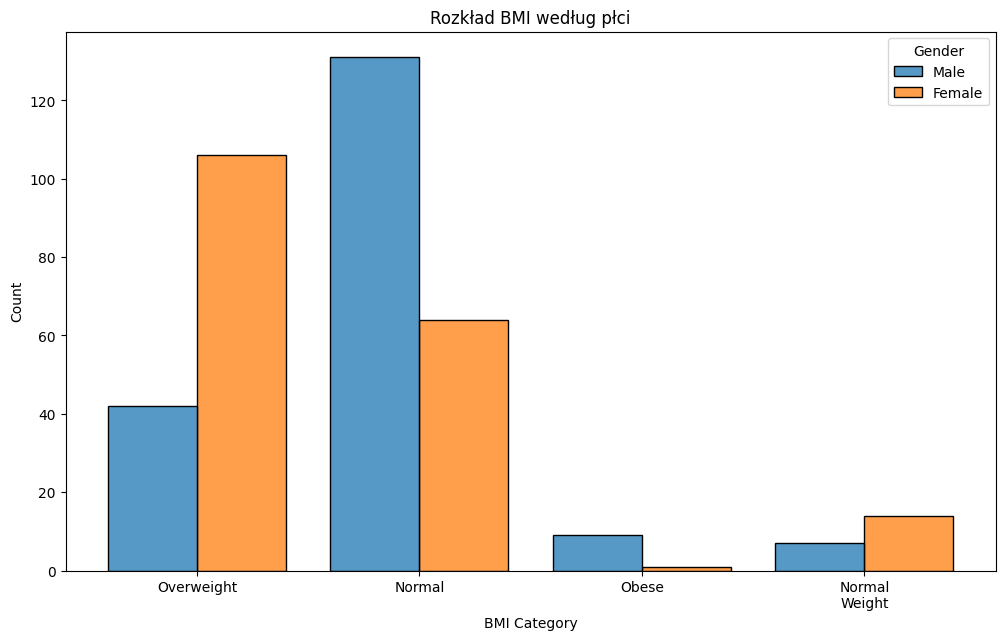

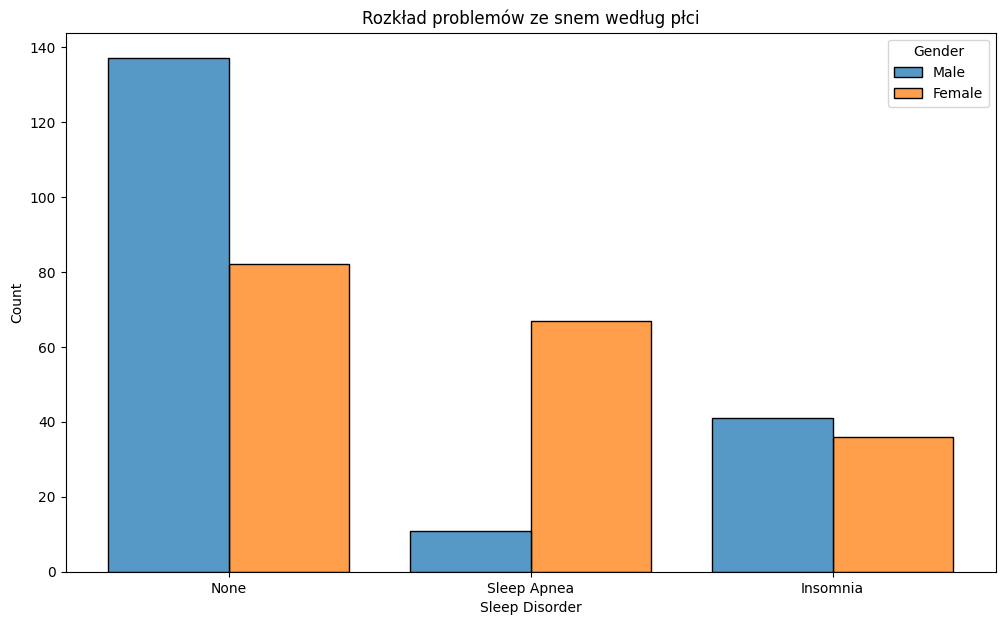

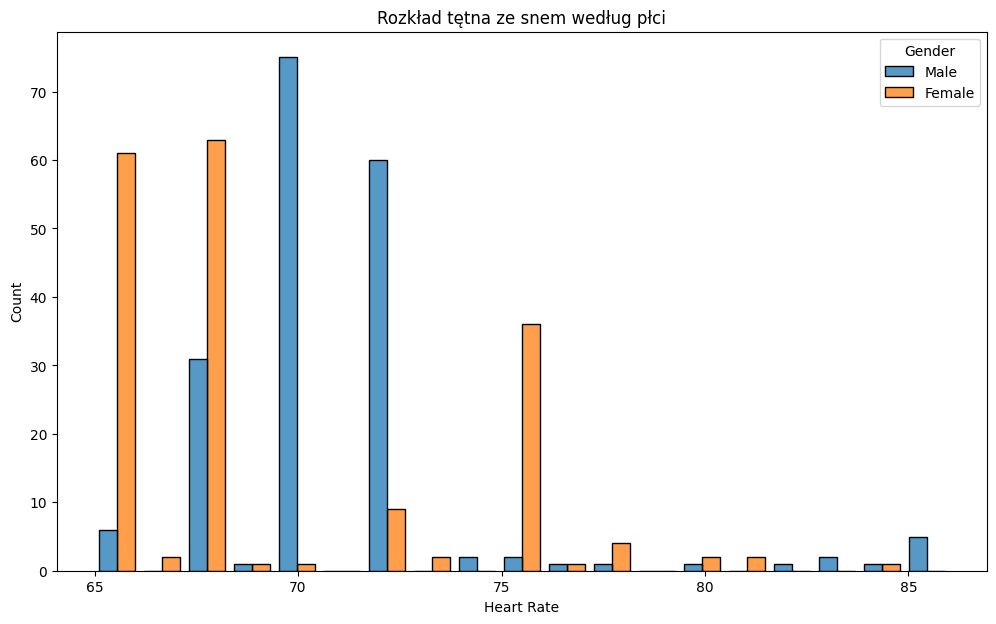

In [135]:

import textwrap
plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['BMI Category','Gender']], x="BMI Category", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Rozkład BMI według płci')

plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['Sleep Disorder','Gender']], x="Sleep Disorder", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Rozkład problemów ze snem według płci')

plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['Heart Rate','Gender']], x="Heart Rate", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Rozkład tętna ze snem według płci')

Na podstawie powżyszych wykresów można stwierdzić, że w zbiorze dominują dane osób rozumianych jako zdrowych.

/tmp/ipykernel_21856/3176287993.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)
/tmp/ipykernel_21856/3176287993.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


Text(0.5, 1.0, 'Problemy ze snem według zawodów')

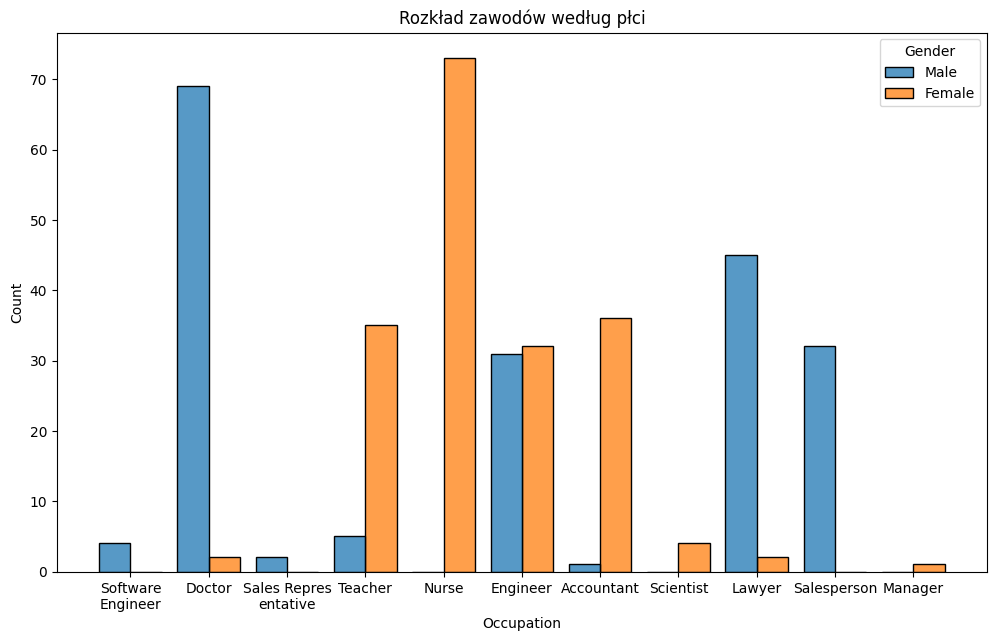

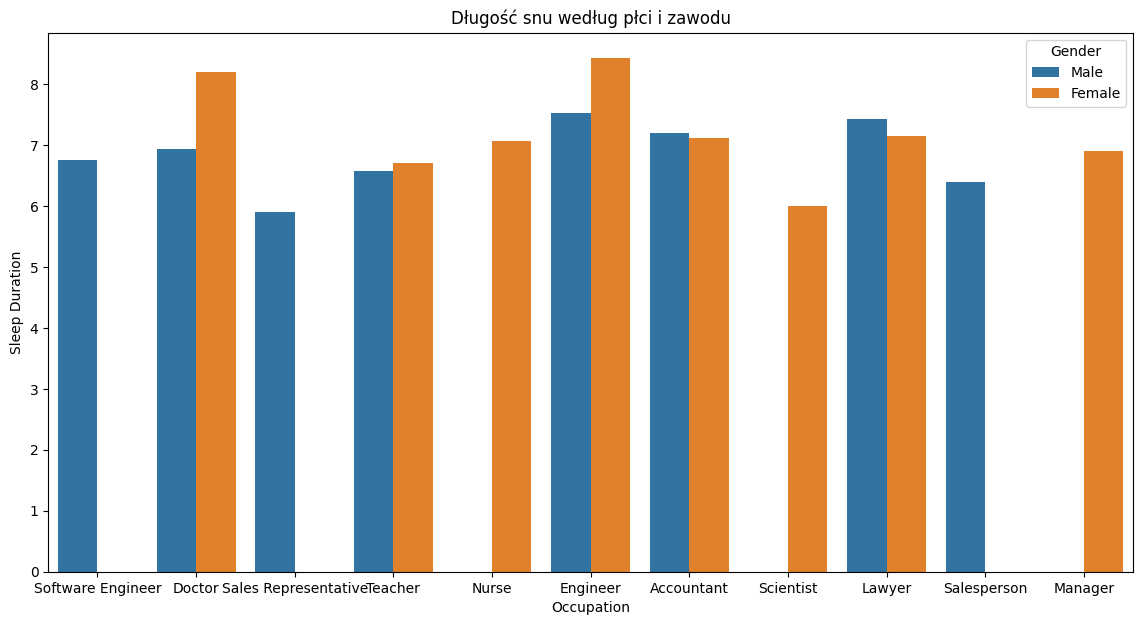

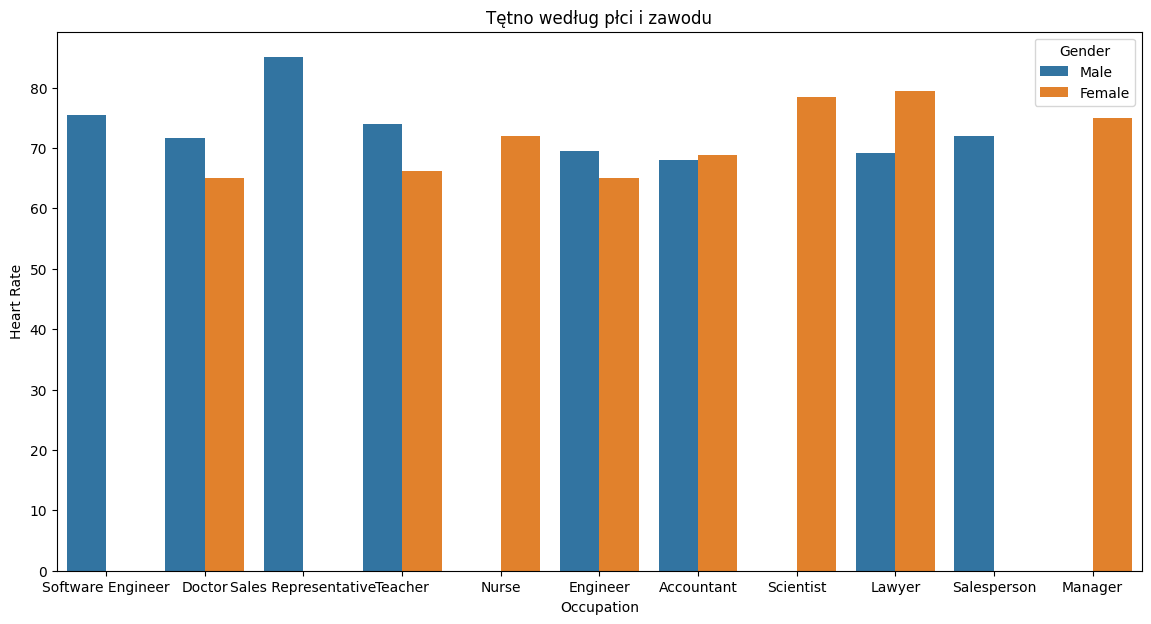

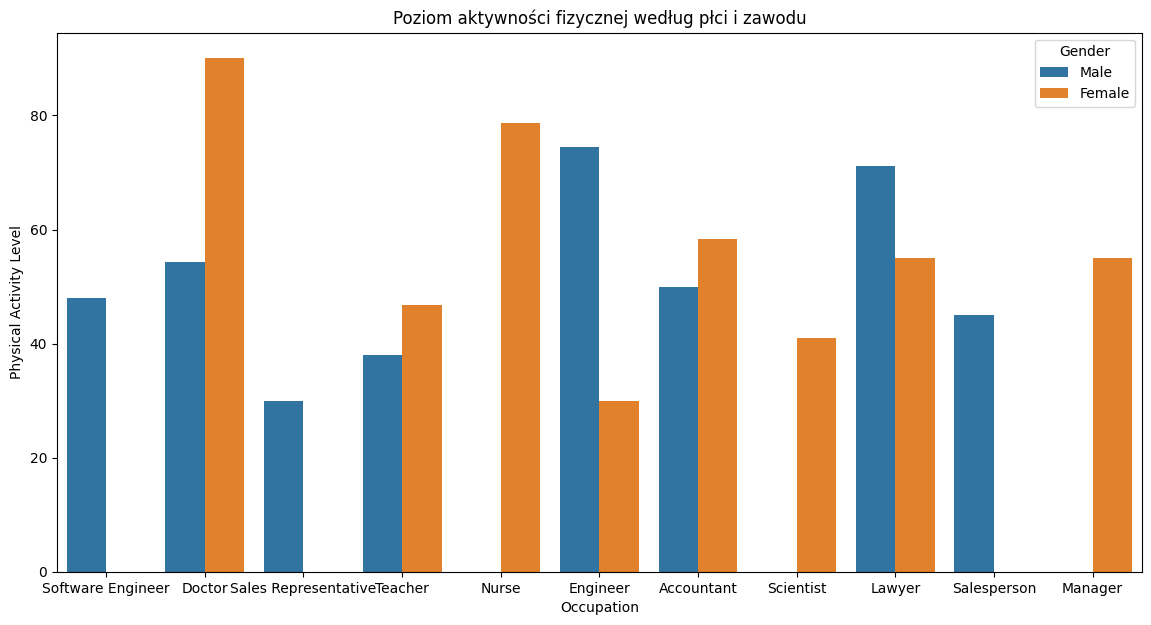

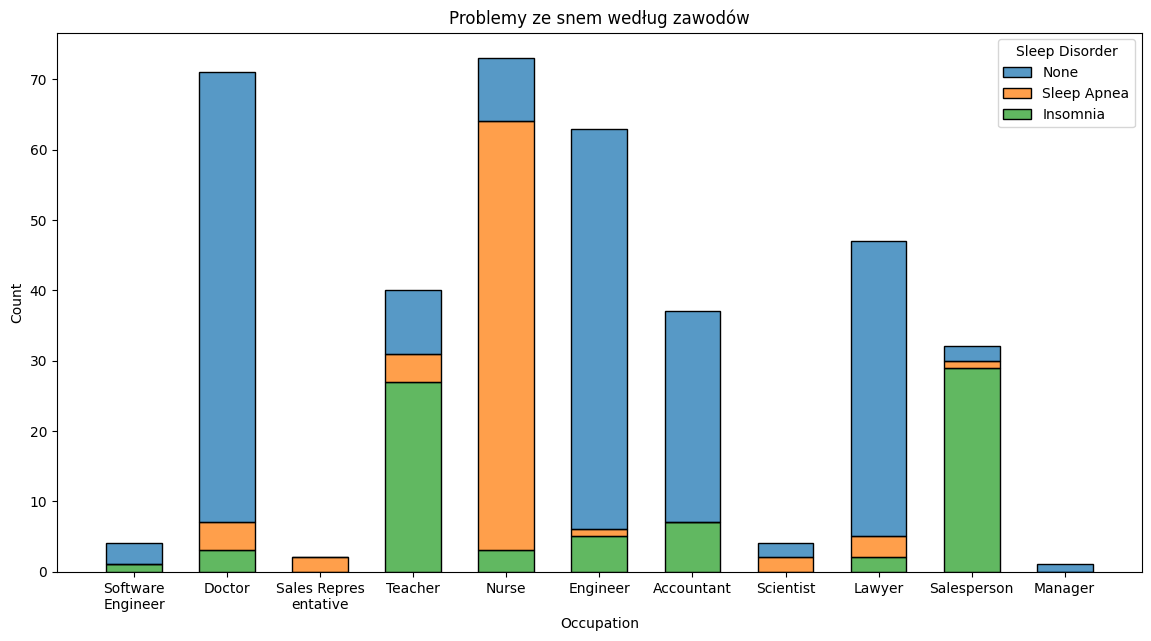

In [136]:



plt.figure(figsize = (12, 7), dpi = 100)
ax=sns.histplot(df[['Occupation','Gender']], x="Occupation", hue="Gender", multiple="dodge",shrink=.8)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title('Rozkład zawodów według płci')
plt.figure(figsize = (14, 7), dpi = 100)
sns.barplot(df[['Occupation','Sleep Duration','Gender']],x='Occupation',y='Sleep Duration',hue='Gender',errorbar=None)
plt.title("Długość snu według płci i zawodu")

plt.figure(figsize = (14, 7), dpi = 100)
sns.barplot(df[['Occupation','Heart Rate','Gender']],x='Occupation',y='Heart Rate',hue='Gender',errorbar=None)
plt.title("Tętno według płci i zawodu")

plt.figure(figsize = (14, 7), dpi = 100)
sns.barplot(df[['Occupation','Physical Activity Level','Gender']],x='Occupation',y='Physical Activity Level',hue='Gender',errorbar=None)
plt.title("Poziom aktywności fizycznej według płci i zawodu")

plt.figure(figsize = (14, 7), dpi = 100)
ax=sns.histplot(data=df[['Occupation','Sleep Disorder']],x='Occupation',hue='Sleep Disorder',multiple="stack",shrink=0.6)
labels = [textwrap.fill(label.get_text(), 12) for label in ax.get_xticklabels()]
ax.set_xticklabels(labels)
plt.title("Problemy ze snem według zawodów")

Powyższa analiza zawodów pozwala stwierdzić, że najbardziej obciążonym zawodem jest Sales Representative, u jego przedstawicieli notuje sie najniższy poziom aktywności fizycznej, najwyższe tętno, najkrótszy sen i wysoki odsetek problemów ze snem. Może być to bezpośrednią przyczyną tego, że jest to jeden z najmniej licznych zawodów w zbiorze. Najmniej obciążeni są przedstawiciele zawodu lekarza. Mają stosunkowo długi sen, wysoki poziom aktywności fizycznej, tętno w granicach średniej oraz mały odsetek problemów ze snem. Jest to również jeden z najliczniejszych zawodów w zbiorze.



Text(0.5, 1.0, 'Rozkład płci')

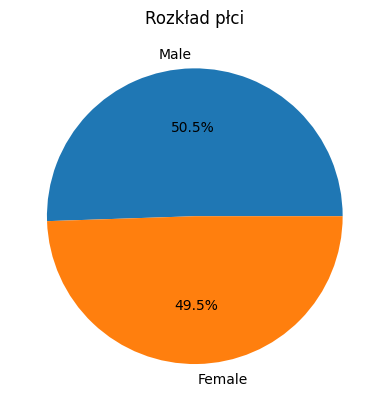

In [137]:
gender_counts= df['Gender'].value_counts()
plt.pie(gender_counts,labels=gender_counts.index, autopct='%1.1f%%')
plt.title("Rozkład płci")

Rozkład płci w danych nie jest wyraźnie zachwiany w żadną ze stron

Text(0.5, 0.98, 'Wiek według Płci')

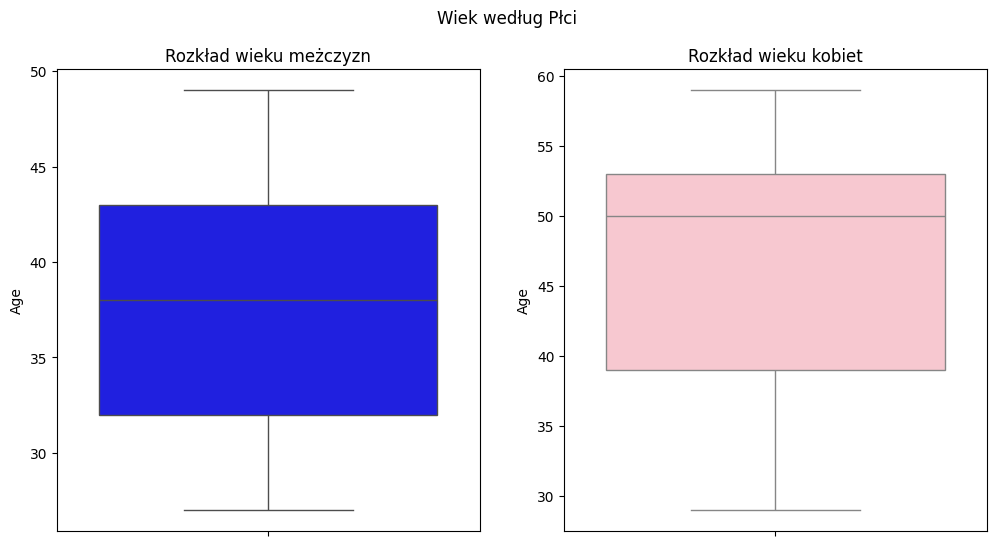

In [138]:


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(df_org[df_org['Gender']=='Male']['Age'],ax=axes[0],color='blue')
axes[0].set_title("Rozkład wieku meżczyzn")

sns.boxplot(df_org[df_org['Gender']=='Female']['Age'],ax=axes[1],color='pink')
axes[1].set_title("Rozkład wieku kobiet")
plt.suptitle('Wiek według Płci')


Powyższe wykresy pozwalają stwierdzić, iż w analizowanym zbiorze przeciętny wiek u kobiet jest wyższy niż u mężczyzn

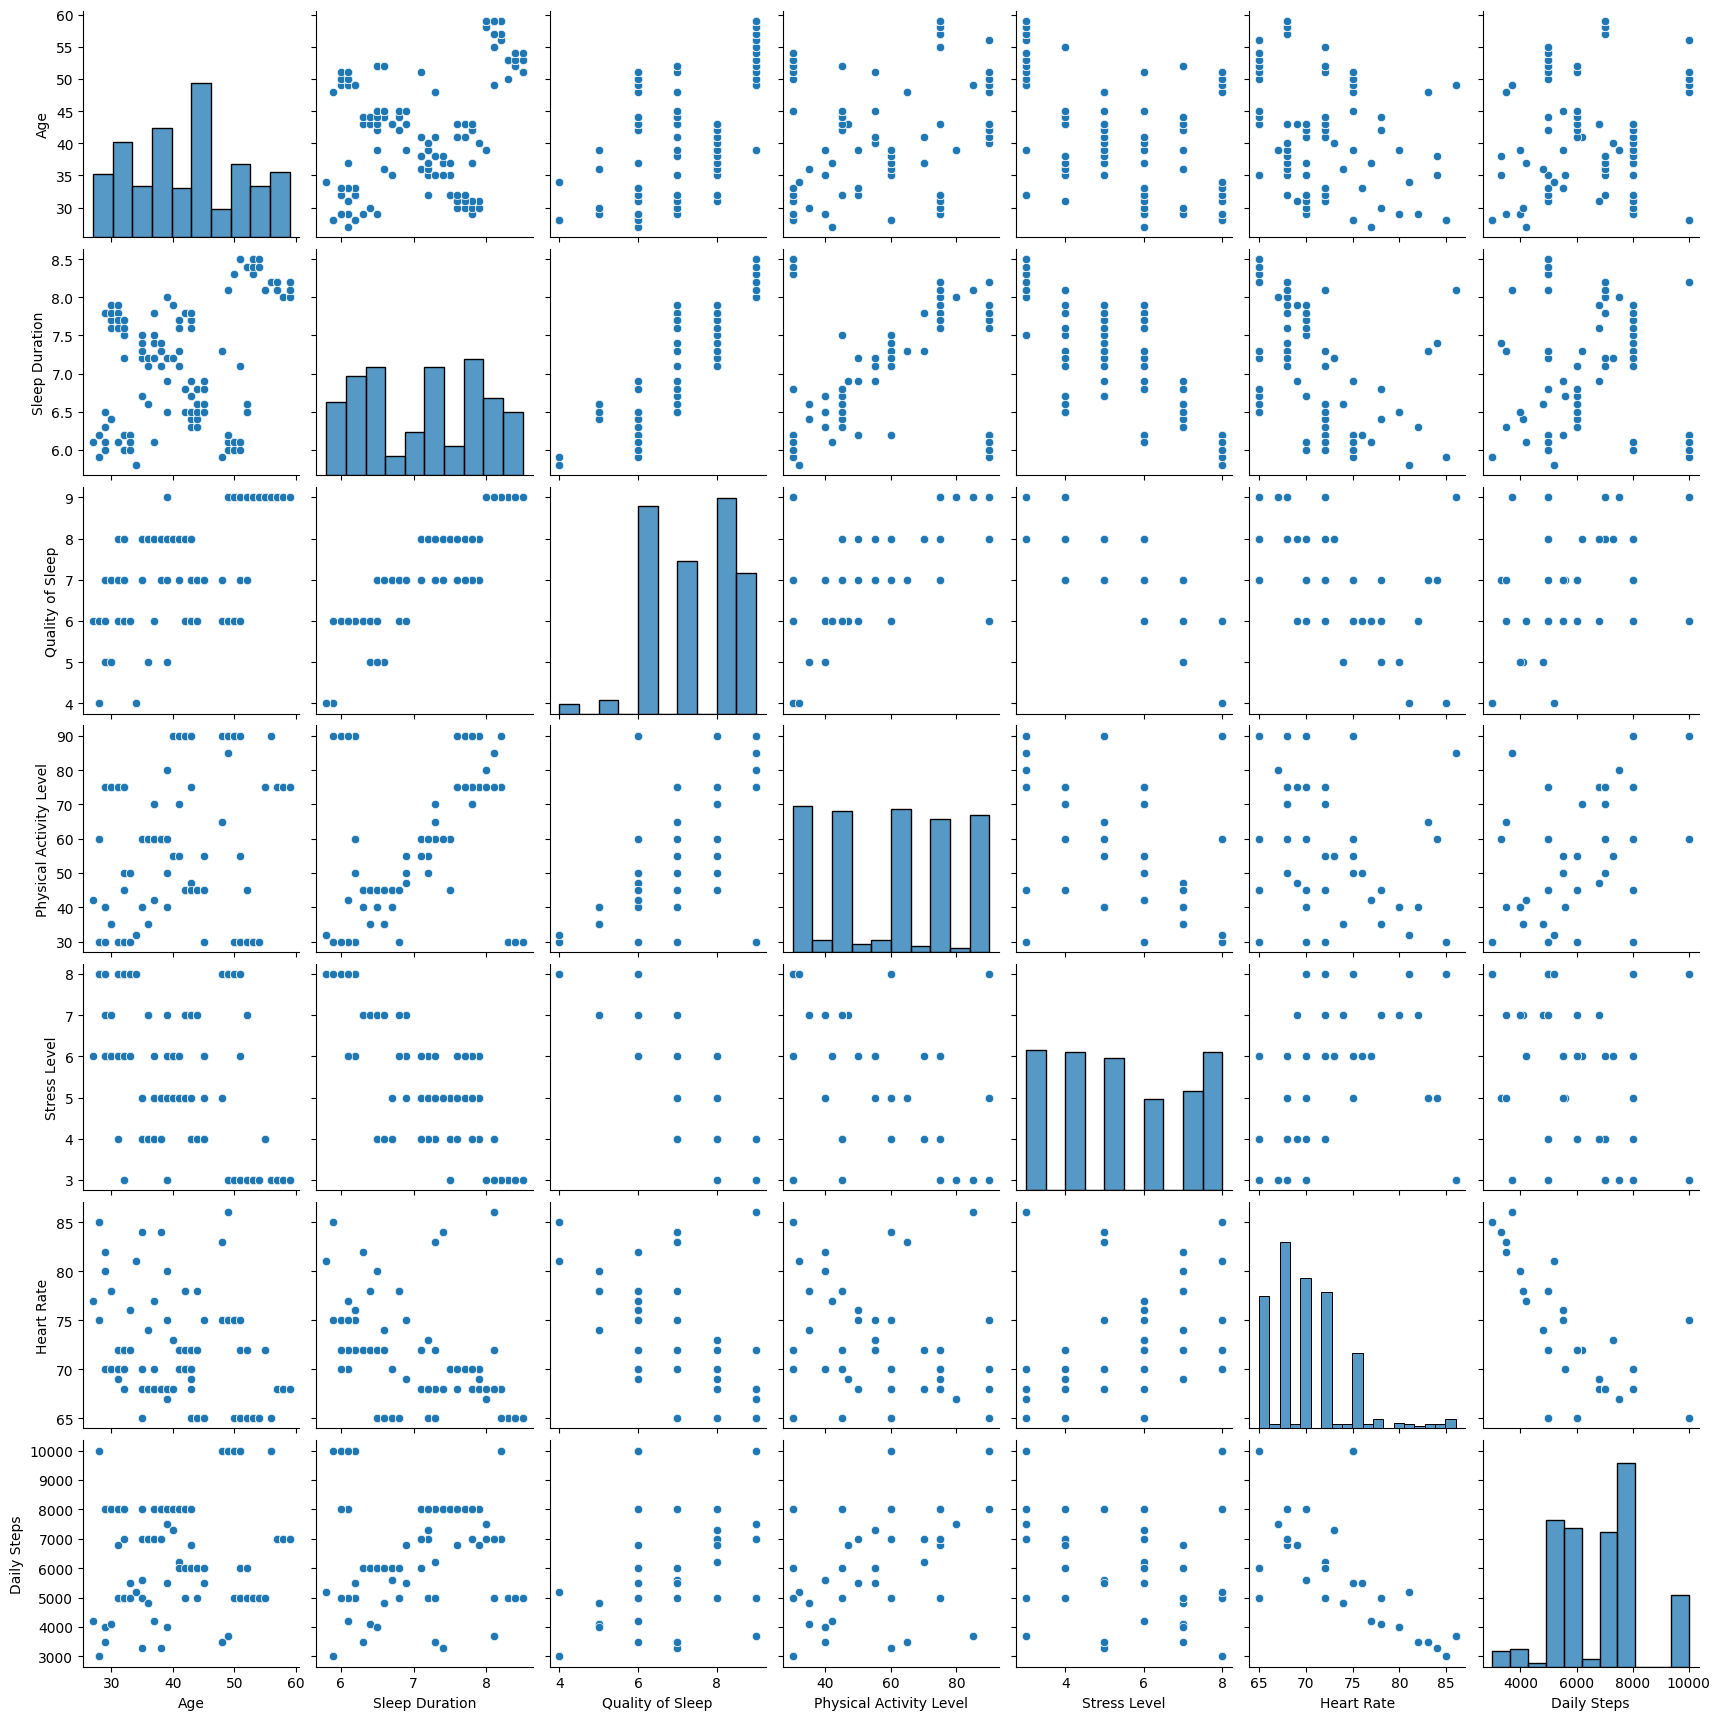

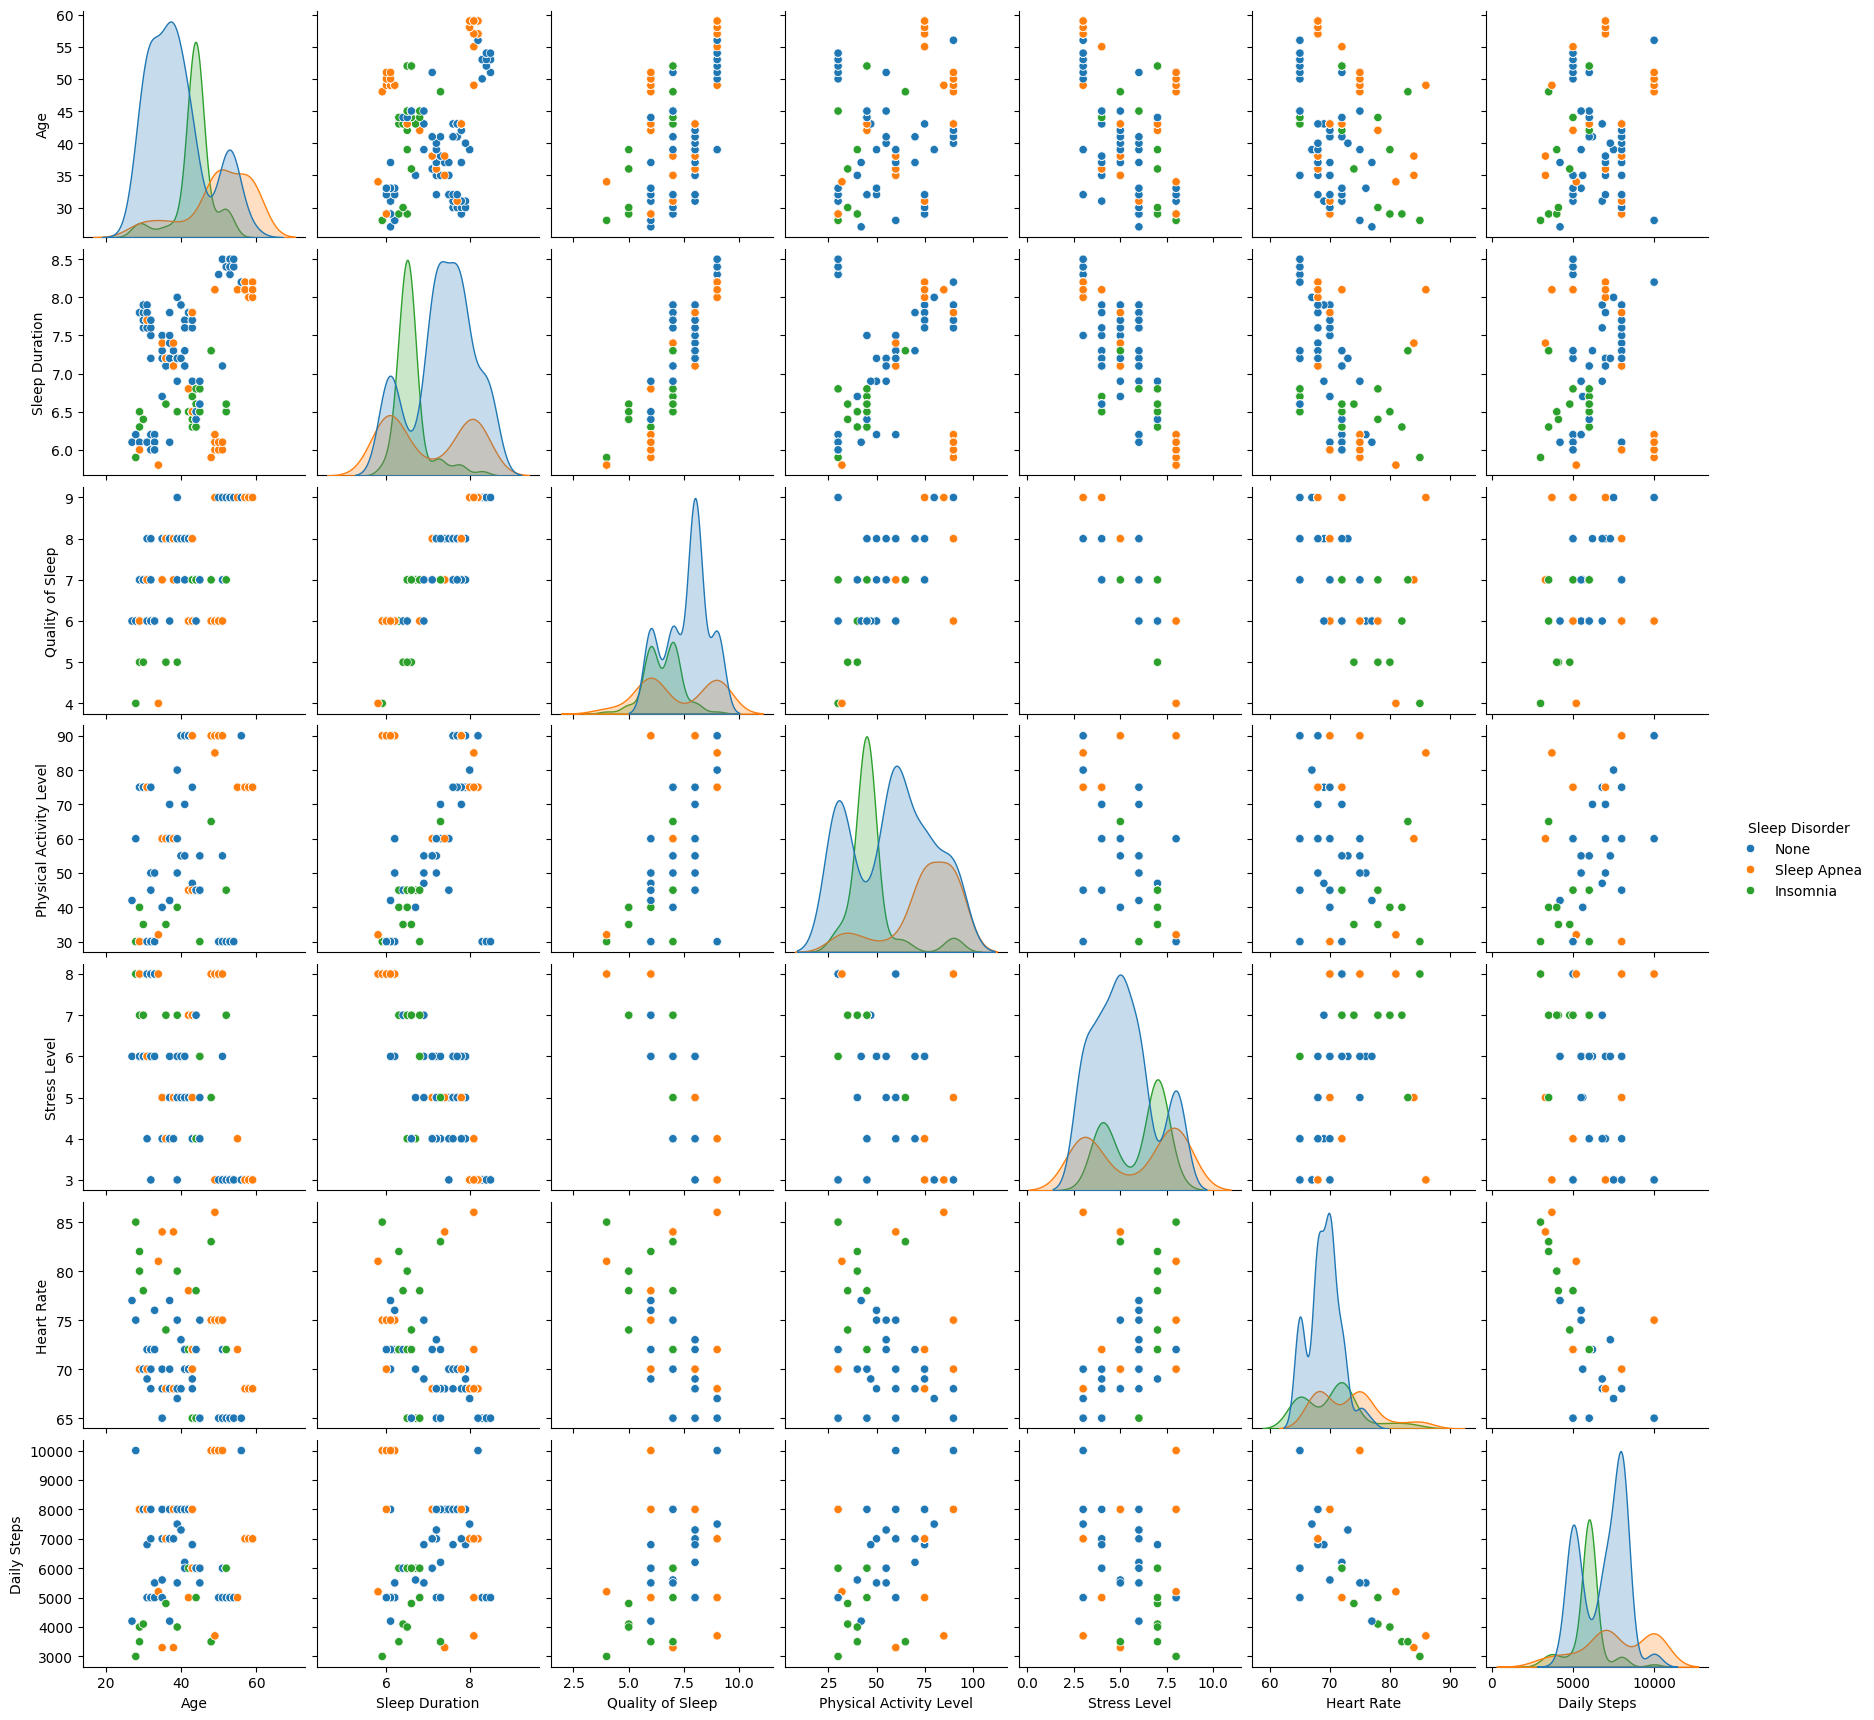

In [139]:

sns.pairplot(data=df.drop(columns='Person ID'))
sns.pairplot(data=df.drop(columns='Person ID'), hue='Sleep Disorder')

Rozkład atrybutów we wzajemnej przestrzeni cech jest w większości przypadków mocno przemieszany. Para wiek/długość snu tworzy pewne niewielkie skupiska na tle pozostałych, lecz są one dość trudne do wyodrębnienia. Pary Sleep Duration i Stress Level oraz Quality of Sleep i Stress Level są dość wyraźnie skorelowane ujemnie, natomiast pary Quality Of Sleep i Sleep Duration oraz Sleep Duration i Physical Activity Level są wyraźnie skorelowane dodatnio.

<Axes: >

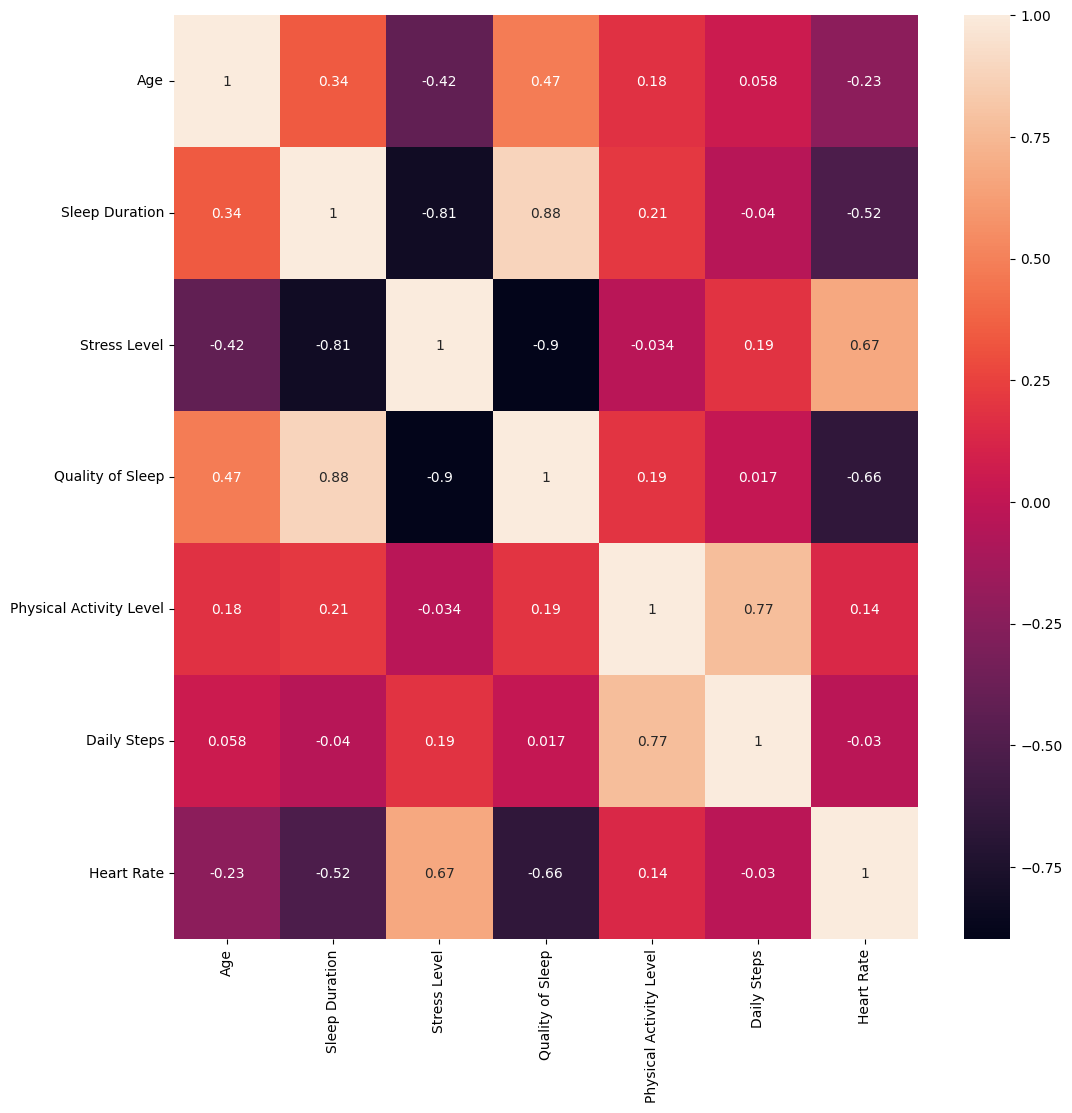

In [140]:
dcorr=df[['Age','Sleep Duration','Stress Level','Quality of Sleep','Physical Activity Level','Daily Steps','Heart Rate']]
plt.figure(figsize = (12, 12), dpi = 100)
sns.heatmap(dcorr.corr(),annot = dcorr.corr())

W powyższej macierzy kowariancji obserwujemy mocne ujemne skorelowanie atrybutów Quality Of Sleep i Stress Level oraz Stress Level i Sleep Duration, a także średnie ujemne skorelowanie atrybutów Quality Of Sleep i Heart Rate, Sleep Duration i Heart Rate oraz Stress Level i Age. Z kolei mocno dodatnio skorelowane są atrybuty Quality Of Sleep i Sleep Duration i średnio dodatnio Stress Level i Heart Rate oraz Physical Activity i Daily Steps. Celem minimalizacji ryzyka nadmiernego dopasowania oraz przyspieszenia procesu uczenia, atrybuty Quality of Sleep i Sleep Duration i Daily Steps nie będą brane pod uwagę w procesie uczenia.

# Uczenie nadzorowane

In [141]:
def granice(model,data,atr_x, atr_y,tytul,kontur = 1):
    # wyświetla granice decyzyjne
    # model - model klasyfikatora
    # dane - dane (słownik zwracany przez funkcje divide)
    # atr_x/atr_y - artybut wyswietlany na osi x/y
    # tytul - wyświetlany tytuł wykresu
    # kontur - par. opcjonalny (=0 -> brak konturu)
    if (kontur == 1):    
        model.fit(np.array(dane["opis_ucz"].iloc[:,[atr_x,atr_y]]), np.array(dane["dec_ucz"]))
        x_min = min(dane["opis_ucz"].iloc[:, atr_x].min(),dane["opis_test"].iloc[:, atr_x].min())
        x_max = max(dane["opis_ucz"].iloc[:, atr_x].max(),dane["opis_test"].iloc[:, atr_x].max())
        y_min = min(dane["opis_ucz"].iloc[:, atr_y].min(),dane["opis_test"].iloc[:, atr_y].min())
        y_max = max(dane["opis_ucz"].iloc[:, atr_y].max(),dane["opis_test"].iloc[:, atr_y].max())
        rozst_x = x_max - x_min
        rozst_y = y_max - y_min
        x_min = x_min - 0.1*rozst_x
        x_max = x_max + 0.1*rozst_x
        y_min = y_min - 0.1*rozst_y
        y_max = y_max + 0.1*rozst_y       
        xx, yy = np.meshgrid(np.arange(x_min, x_max, (x_max-x_min)/150),
                     np.arange(y_min, y_max, (y_max-y_min)/150))
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
    plt.figure(dpi = 100)
    plt.title(tytul)
    if (kontur == 1):
        plt.contourf(xx, yy, Z, levels = 4, alpha=0.2)
    plt.scatter(dane["opis_ucz"].iloc[:, atr_x], dane["opis_ucz"].iloc[:, atr_y], c=dane["dec_ucz"], marker = '.')
    plt.scatter(dane["opis_test"].iloc[:, atr_x], dane["opis_test"].iloc[:, atr_y], c=dane["dec_test"], marker = 'x')

In [142]:
def divide(df,proporcja):
    # divides set to training and test subsets
    # df - data frame; proporcja - division ratio
    # returns dictionary with following keys:
    # opis_ucz/opis_test - matrix of describing attributes training/test set
    # dec_ucz/dec_test - vector of decision attribute's values of training/test set
    # attention: decision attribute is always the last column of df
    opis_ucz, opis_test, dec_ucz, dec_test = train_test_split(df.iloc[:,0:-1], df.iloc[:,-1].astype('category').cat.codes, test_size=proporcja, random_state=2)
    return {"opis_ucz":opis_ucz, "opis_test":opis_test, "dec_ucz":dec_ucz, "dec_test":dec_test}



In [143]:
def verify(model,data,atrib):
    # prints classifier results as confusion matrix
    # for test and training set
    # model - classifier model
    # data - data (dictionary returned by divide function)
    # atrib - list of attributes' indexes considered in verification 
    model.fit(data["opis_ucz"].iloc[:,atrib], data["dec_ucz"])
    result_train = model.predict(data["opis_ucz"].iloc[:,atrib])
    result_test = model.predict(data["opis_test"].iloc[:,atrib])
    cm_train = confusion_matrix(data["dec_ucz"],wynik_ucz)
    print("macierz pomyłek - zbiór uczący, dokładność:",np.sum(np.diag(mp_ucz))/np.sum(mp_ucz))
    print(model.score(data['opis_ucz'],data['dec_ucz']))
    print(mp_ucz)
    cm_test = confusion_matrix(data["dec_test"],wynik_test)
    print("macierz pomyłek - zbiór testowy, dokładność:",np.sum(np.diag(cm_test))/np.sum(cm_test))
    print(model.score(data['opis_test'],data['dec_test']))
    print(cm_test) 
    return cm_ucz,cm_test
    

In [144]:
df['Gender']=df['Gender'].apply(lambda x:1 if x=='Male' else 0)
#d=df[['Age','Gender','Stress Level','Physical Activity Level','Daily Steps','Sleep Disorder']]
d=df[['Age','Stress Level','Heart Rate','Physical Activity Level','Sleep Disorder']]

In [145]:
def errorChart(error_data,xlabel,ylabel):
    plt.figure(dpi=90)
    plt.plot(np.arange(1, len(error_data)+1), error_data,'bo-')
    plt.title('Wykres błędu')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    

### Klasyfikator KNN

macierz pomyłek - zbiór uczący, dokładność: 0.8199233716475096
0.8199233716475096
[[ 49   3   3]
 [ 16 120  15]
 [  2   8  45]]
macierz pomyłek - zbiór testowy, dokładność: 0.831858407079646
0.831858407079646
[[19  2  1]
 [ 5 56  7]
 [ 1  3 19]]
macierz pomyłek - zbiór uczący, dokładność: 0.8007662835249042
0.8007662835249042
[[ 52   3   0]
 [ 20 129   2]
 [ 16  11  28]]
macierz pomyłek - zbiór testowy, dokładność: 0.8053097345132744
0.8053097345132744
[[19  3  0]
 [ 7 60  1]
 [ 7  4 12]]
macierz pomyłek - zbiór uczący, dokładność: 0.9118773946360154
0.9118773946360154
[[ 48   4   3]
 [  5 142   4]
 [  3   4  48]]
macierz pomyłek - zbiór testowy, dokładność: 0.9292035398230089
0.9292035398230089
[[19  3  0]
 [ 2 65  1]
 [ 1  1 21]]
macierz pomyłek - zbiór uczący, dokładność: 0.9003831417624522
0.9003831417624522
[[ 47   5   3]
 [  4 142   5]
 [  3   6  46]]
macierz pomyłek - zbiór testowy, dokładność: 0.9292035398230089
0.9292035398230089
[[19  3  0]
 [ 2 65  1]
 [ 1  1 21]]
macierz po

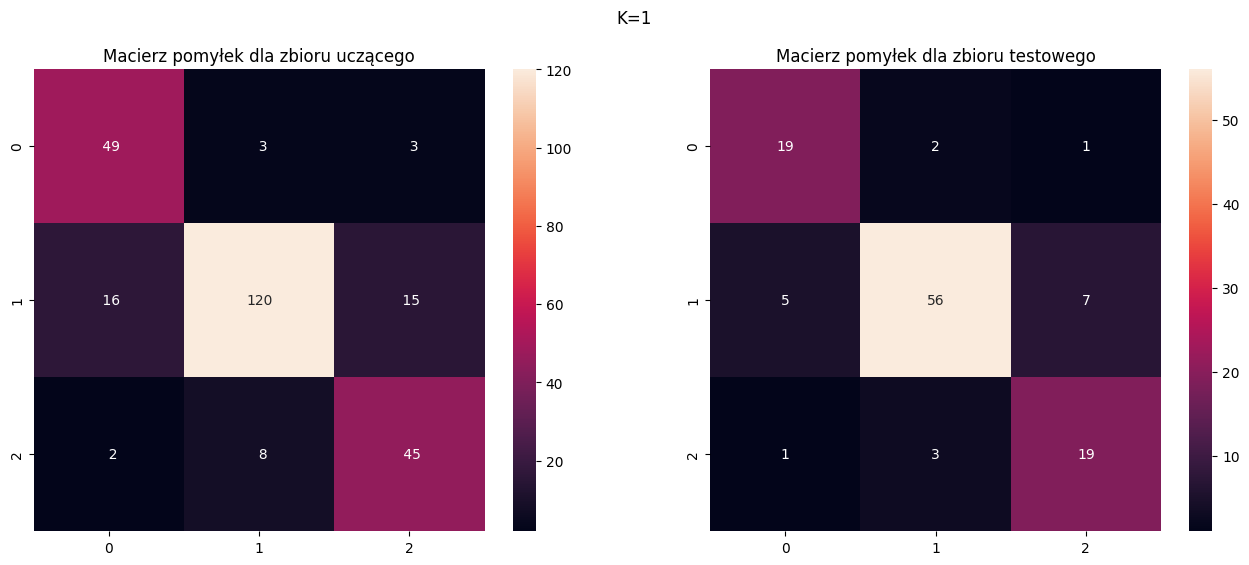

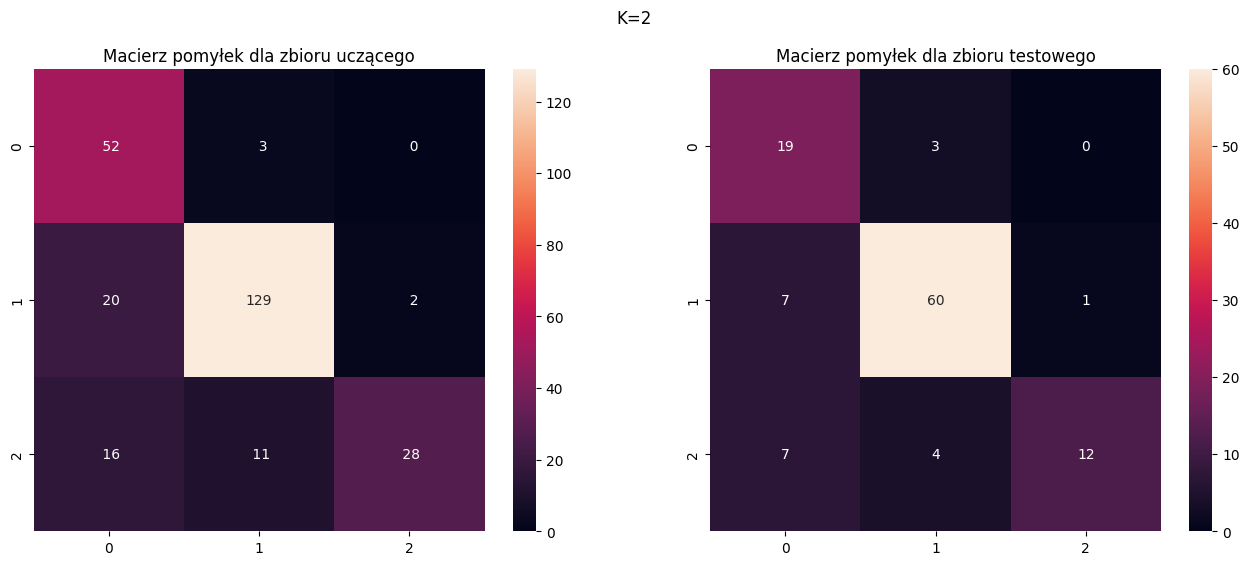

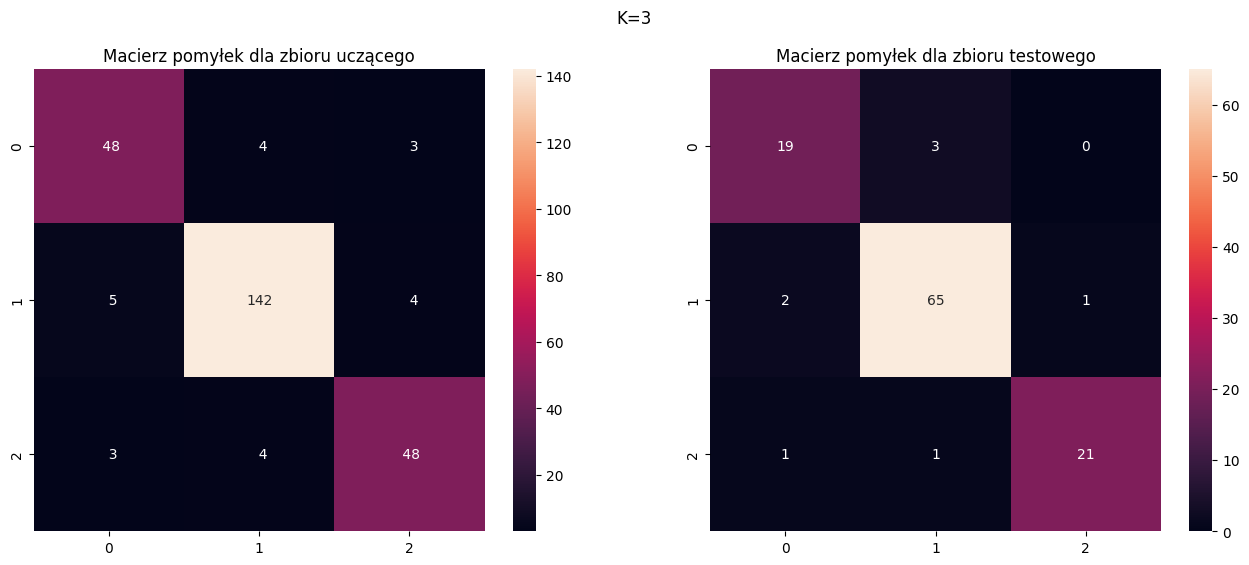

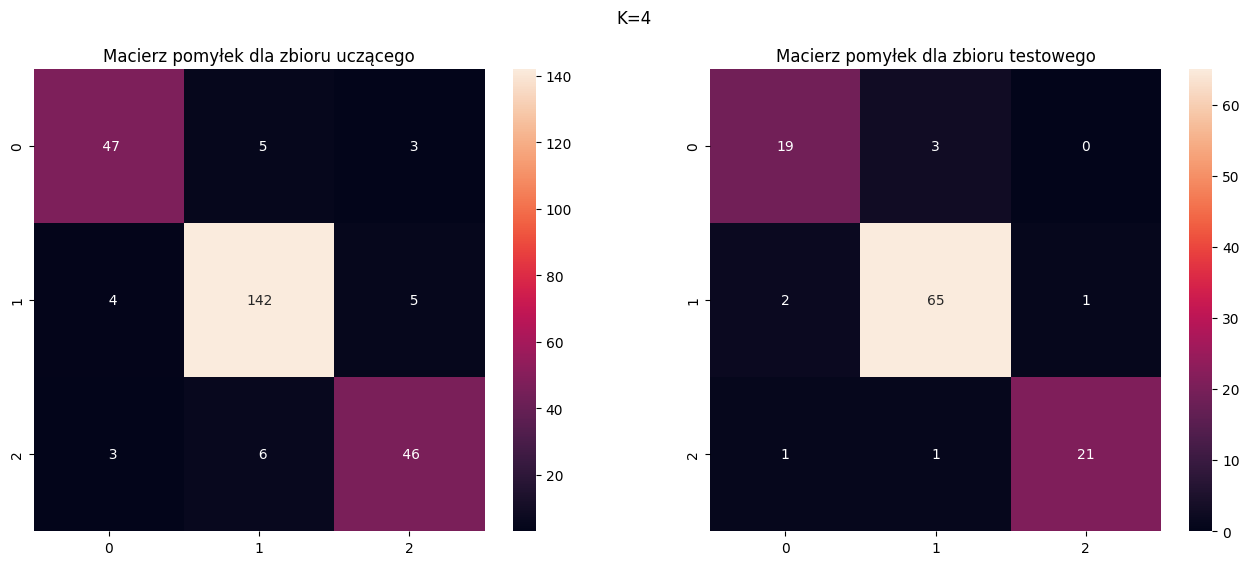

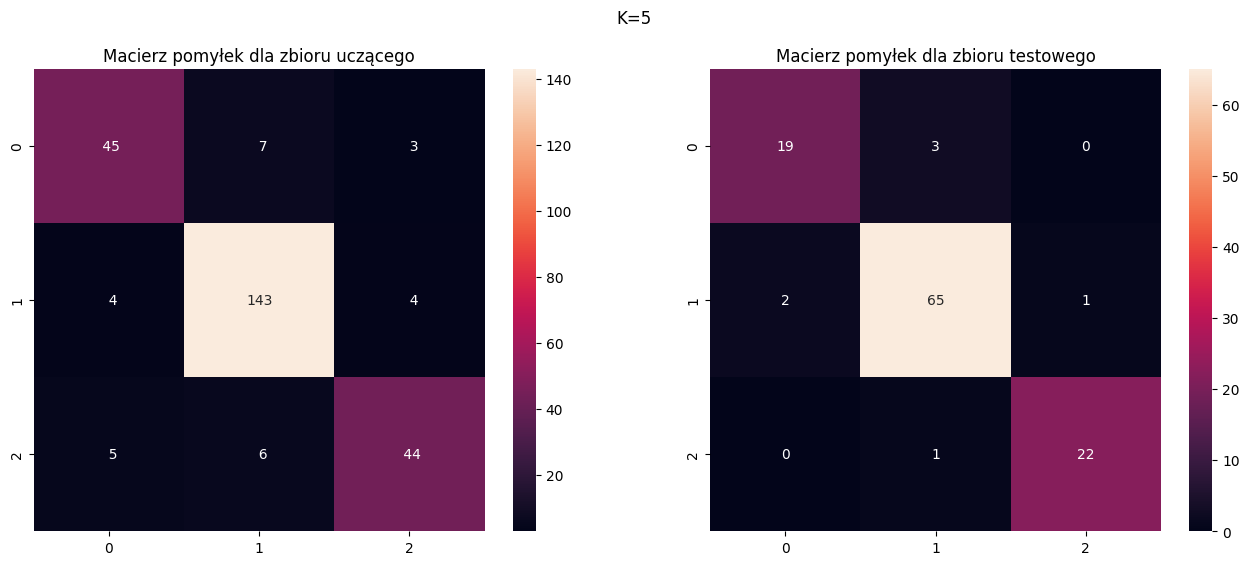

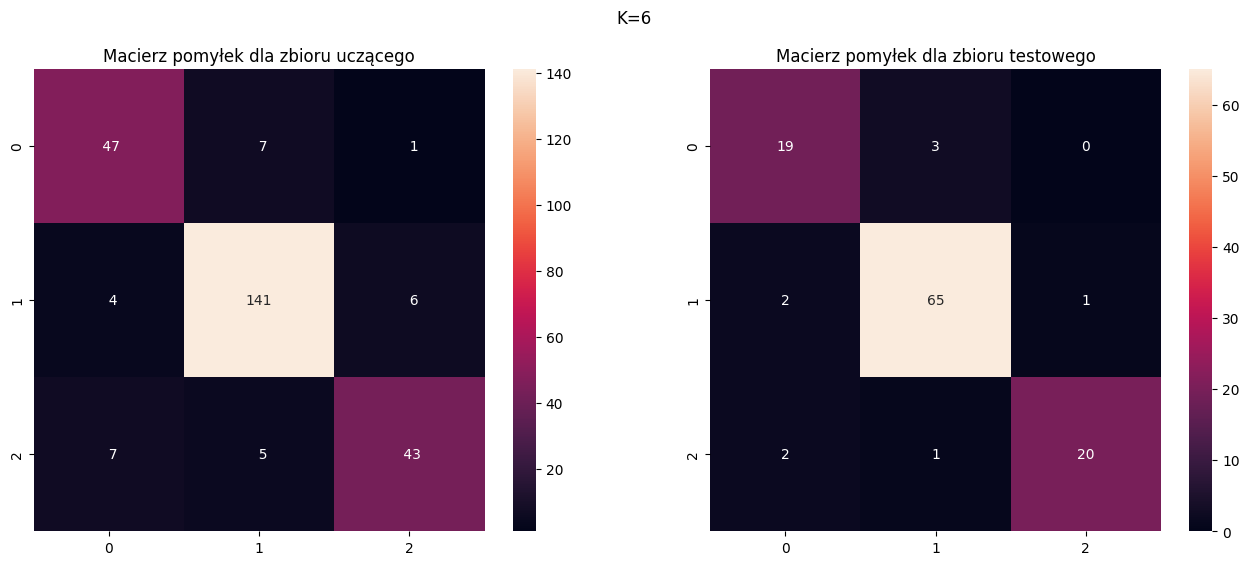

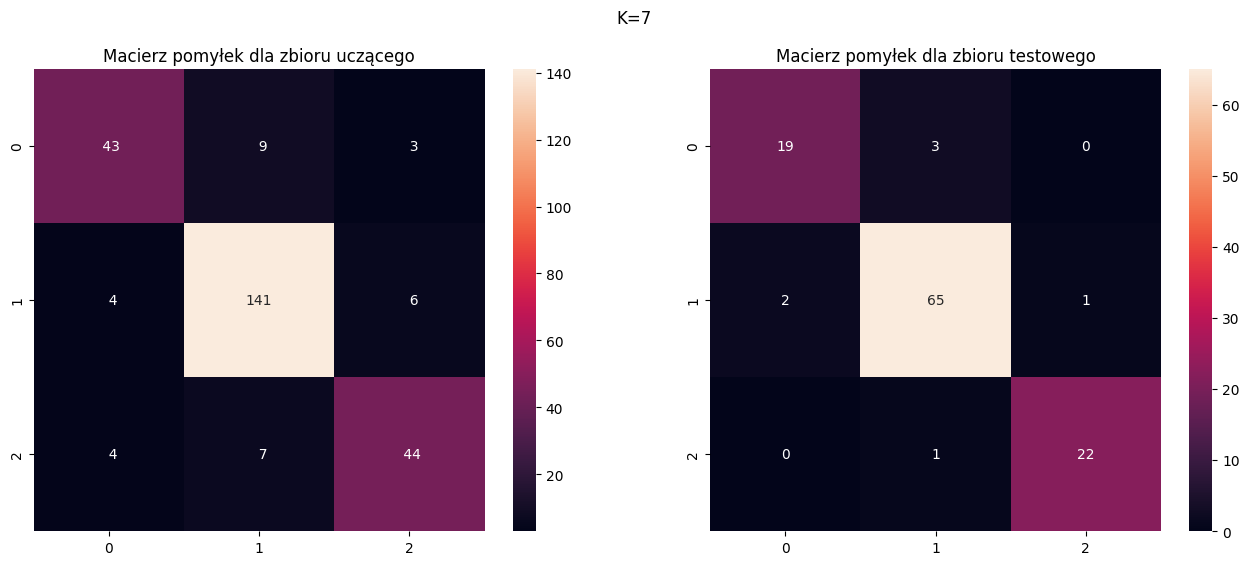

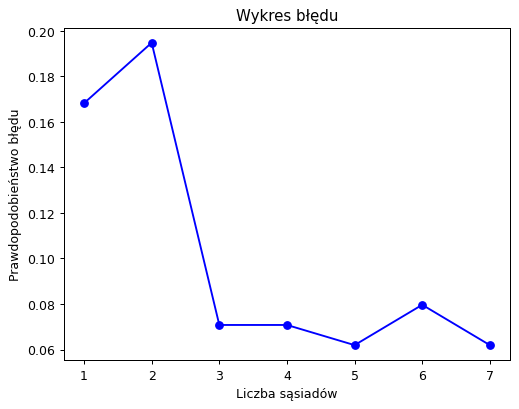

In [146]:
data = divide(d,0.3)
rss_all=np.zeros(7)
for k in range(1,8):
    model= KNeighborsClassifier(n_neighbors=k) 
    matrix= weryfikuj(model,data,[0,1,2,3])
    rss_all[k-1] = 1-model.score(data["opis_test"],data["dec_test"])
    plt.figure(figsize=(16,6),dpi=100)
    plt.subplot(1,2,1)
    sns.heatmap(matrix[0],annot=matrix[0],fmt="3d")
    plt.title("Macierz pomyłek dla zbioru uczącego")
    plt.subplot(1,2,2)
    sns.heatmap(matrix[1],annot=matrix[1],annot_kws={"size": 10})
    plt.title("Macierz pomyłek dla zbioru testowego")
    plt.suptitle("K="+str(k))
errorChart(rss_all,"Liczba sąsiadów","Prawdopodobieństwo błędu")


Dla k=3 można uzyskać optymalnie przystosowany klasyfikator o skuteczności około 92%. Dla większych k istnieje niewiele większa skuteczność, lecz obarczona ryzykiem nadmiernego dopasowania.

### Klasyfikator najbliższego prototypu

macierz pomyłek - zbiór uczący, dokładność: 0.5440613026819924
0.5440613026819924
[[49  0  6]
 [56 50 45]
 [ 8  4 43]]
macierz pomyłek - zbiór testowy, dokładność: 0.5486725663716814
0.5486725663716814
[[20  2  0]
 [17 22 29]
 [ 3  0 20]]


Text(0.5, 1.0, 'Macierz pomyłek dla zbioru testowego')

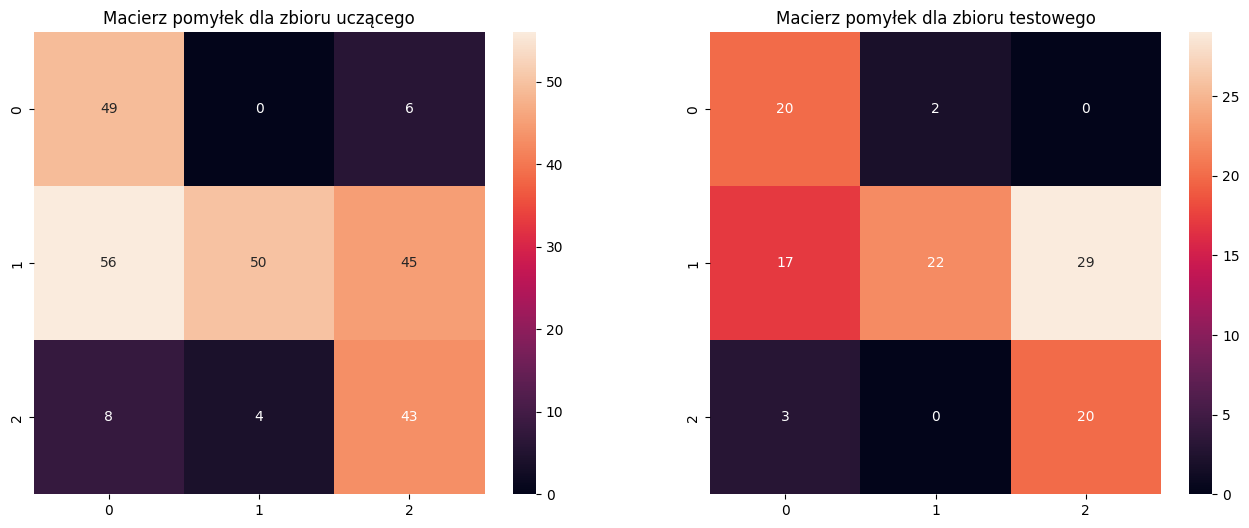

In [147]:
data = divide(d,0.3)
model= NearestCentroid()
matrix=weryfikuj(model,data,[0,1,2,3])
plt.figure(figsize=(16,6),dpi=100)
plt.subplot(1,2,1)
sns.heatmap(matrix[0],annot=matrix[0])
plt.title("Macierz pomyłek dla zbioru uczącego")
plt.subplot(1,2,2)
sns.heatmap(matrix[1],annot=matrix[1])
plt.title("Macierz pomyłek dla zbioru testowego")


Skuteczność tego klasyfikatora (ok. 54 %) jest dużo mniejsza od tej uzyskiwanej przez KNN (ok .92 %). Klasyfikator ten nie wykazuje przydatności do rozwiązania tego problemu.

### Naiwny klasyfikator Bayesa

macierz pomyłek - zbiór uczący, dokładność: 0.8199233716475096
0.8199233716475096
[[ 34  18   3]
 [  6 139   6]
 [ 10   4  41]]
macierz pomyłek - zbiór testowy, dokładność: 0.831858407079646
0.831858407079646
[[10 12  0]
 [ 3 64  1]
 [ 2  1 20]]


Text(0.5, 1.0, 'Macierz pomyłek dla zbioru testowego')

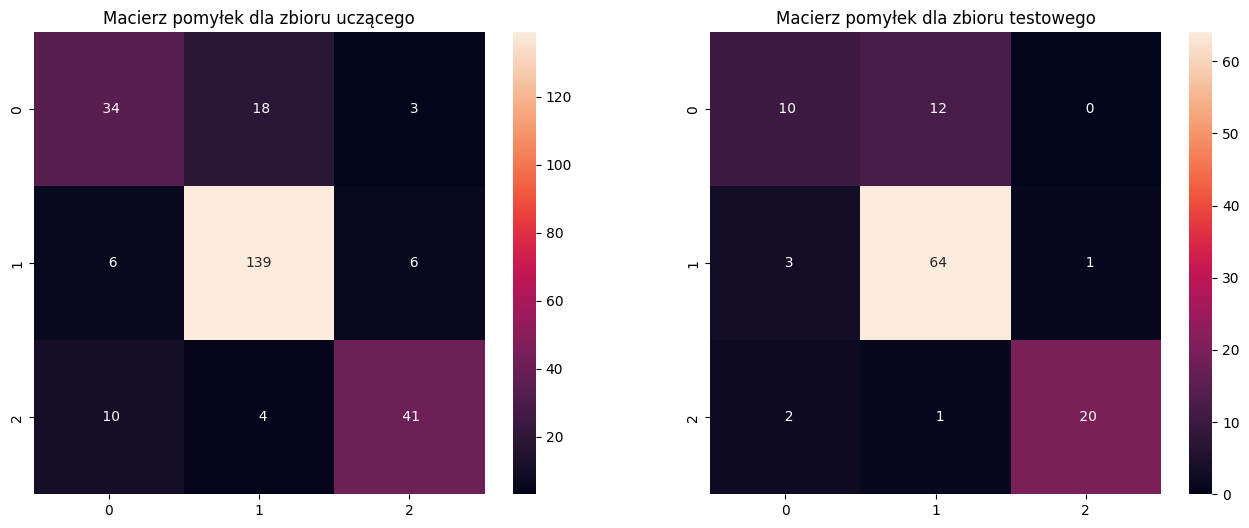

In [148]:
model= GaussianNB()
data = divide(d,0.3)
matrix=weryfikuj(model,data,[0,1,2,3])
plt.figure(figsize=(16,6),dpi=100)
plt.subplot(1,2,1)
sns.heatmap(matrix[0],annot=matrix[0],fmt="3d")
plt.title("Macierz pomyłek dla zbioru uczącego")
plt.subplot(1,2,2)
sns.heatmap(matrix[1],annot=matrix[1],fmt="3d")
plt.title("Macierz pomyłek dla zbioru testowego")

Skuteczność wynosi około 82%. Klasyfikator jest niewiele gorszy od KNN

### Drzewo decyzyjne

macierz pomyłek - zbiór uczący, dokładność: 0.5938697318007663
0.5938697318007663
[[ 48   7   0]
 [ 44 107   0]
 [ 45  10   0]]
macierz pomyłek - zbiór testowy, dokładność: 0.584070796460177
0.584070796460177
[[19  3  0]
 [21 47  0]
 [20  3  0]]
macierz pomyłek - zbiór uczący, dokładność: 0.7662835249042146
0.7662835249042146
[[ 45   2   8]
 [ 29 107  15]
 [  3   4  48]]
macierz pomyłek - zbiór testowy, dokładność: 0.7787610619469026
0.7787610619469026
[[19  3  0]
 [ 9 47 12]
 [ 0  1 22]]
macierz pomyłek - zbiór uczący, dokładność: 0.89272030651341
0.89272030651341
[[ 48   5   2]
 [  5 140   6]
 [  5   5  45]]
macierz pomyłek - zbiór testowy, dokładność: 0.9203539823008849
0.9203539823008849
[[19  3  0]
 [ 2 65  1]
 [ 2  1 20]]
macierz pomyłek - zbiór uczący, dokładność: 0.9118773946360154
0.9118773946360154
[[ 49   4   2]
 [  5 142   4]
 [  4   4  47]]
macierz pomyłek - zbiór testowy, dokładność: 0.9203539823008849
0.9203539823008849
[[19  3  0]
 [ 2 65  1]
 [ 2  1 20]]
macierz pomyłe

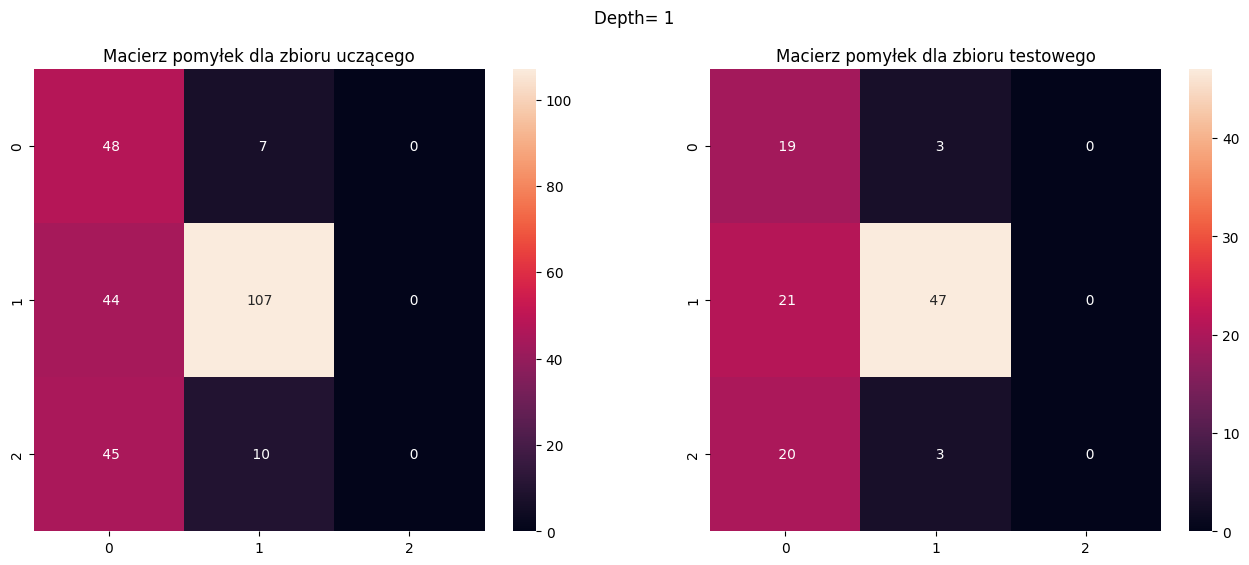

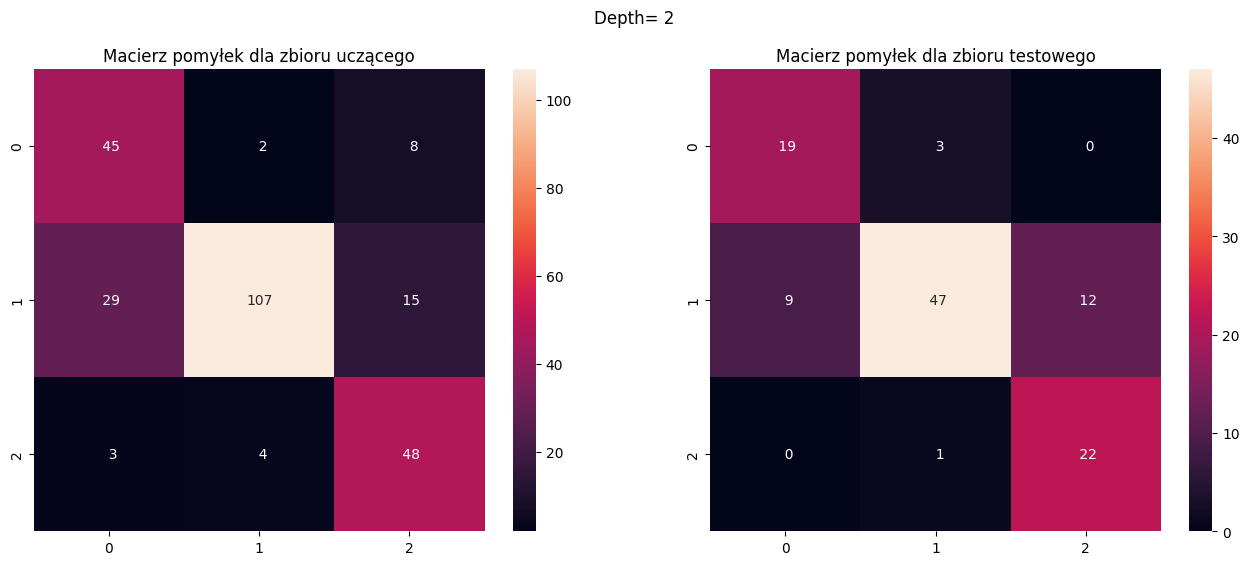

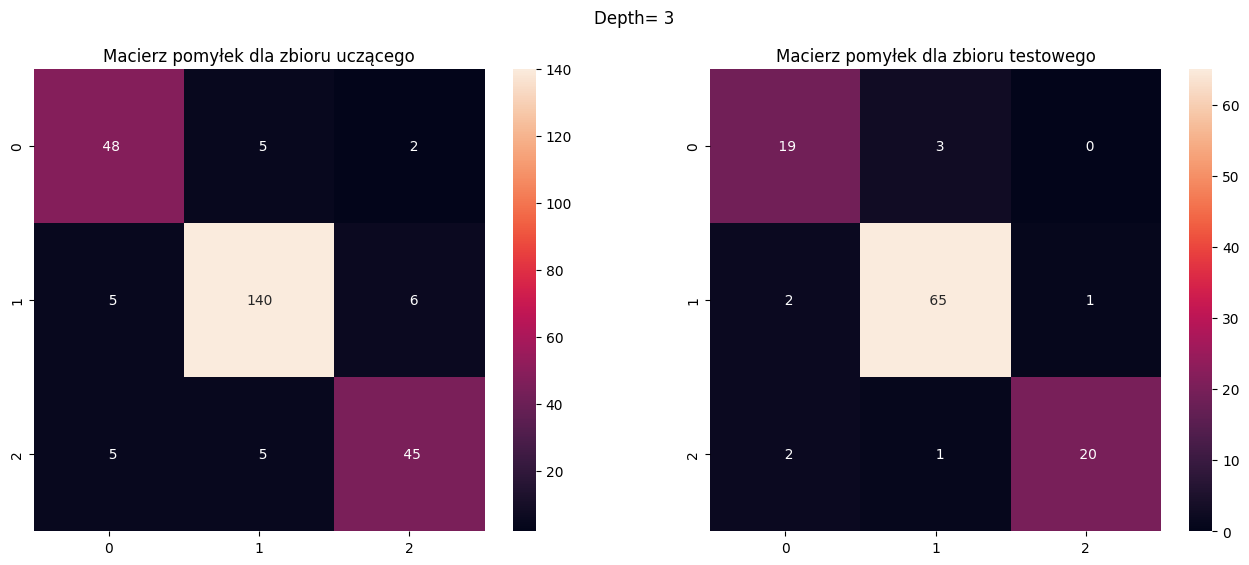

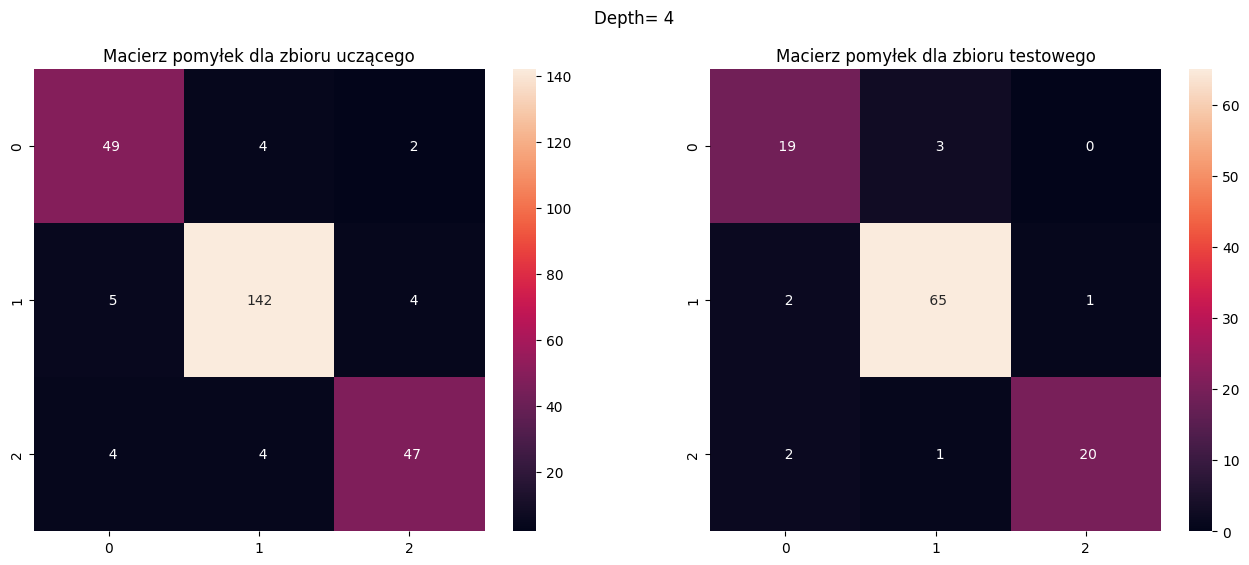

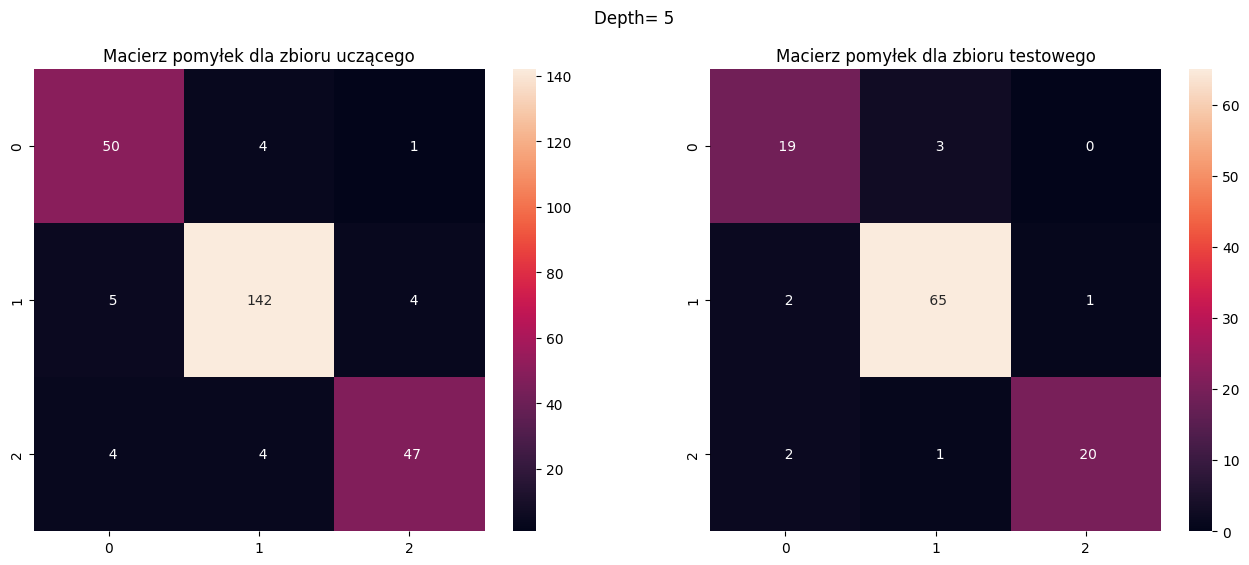

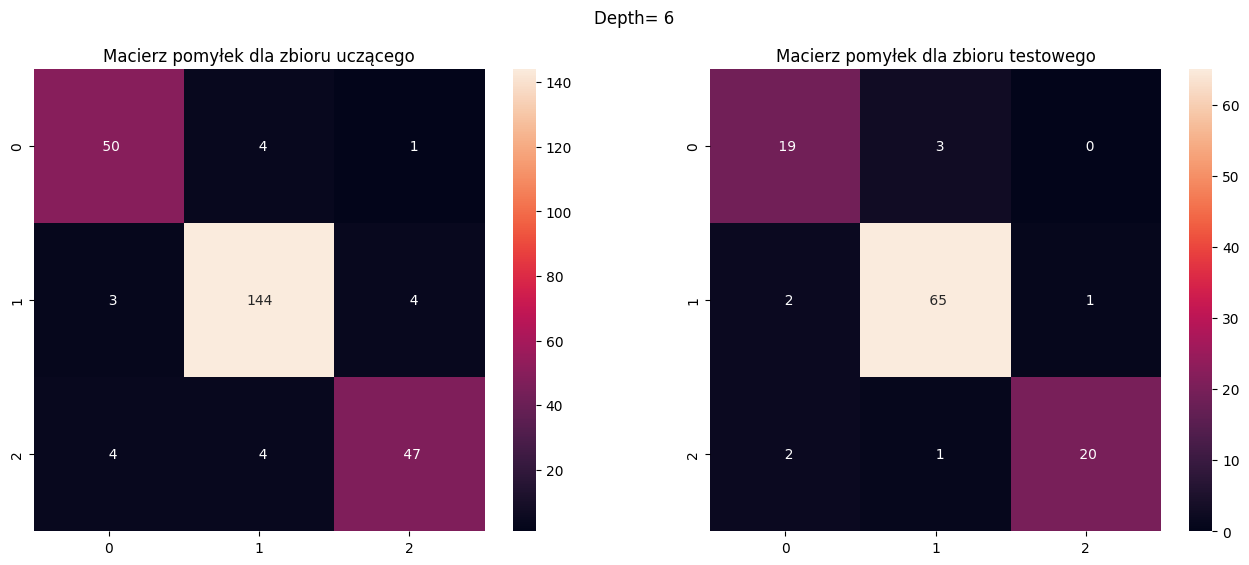

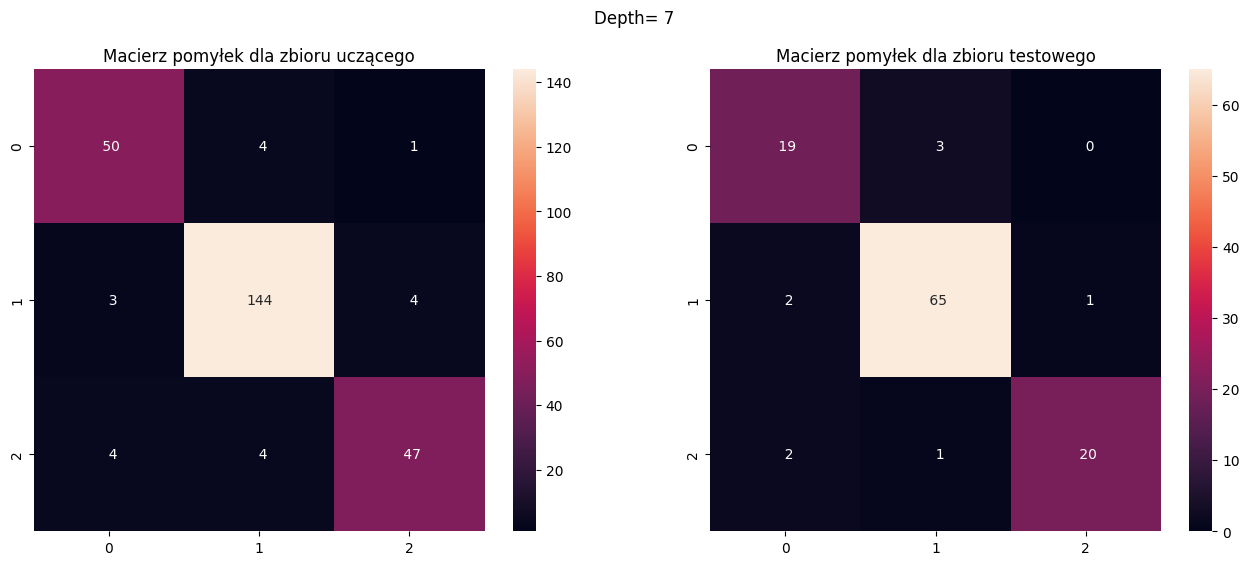

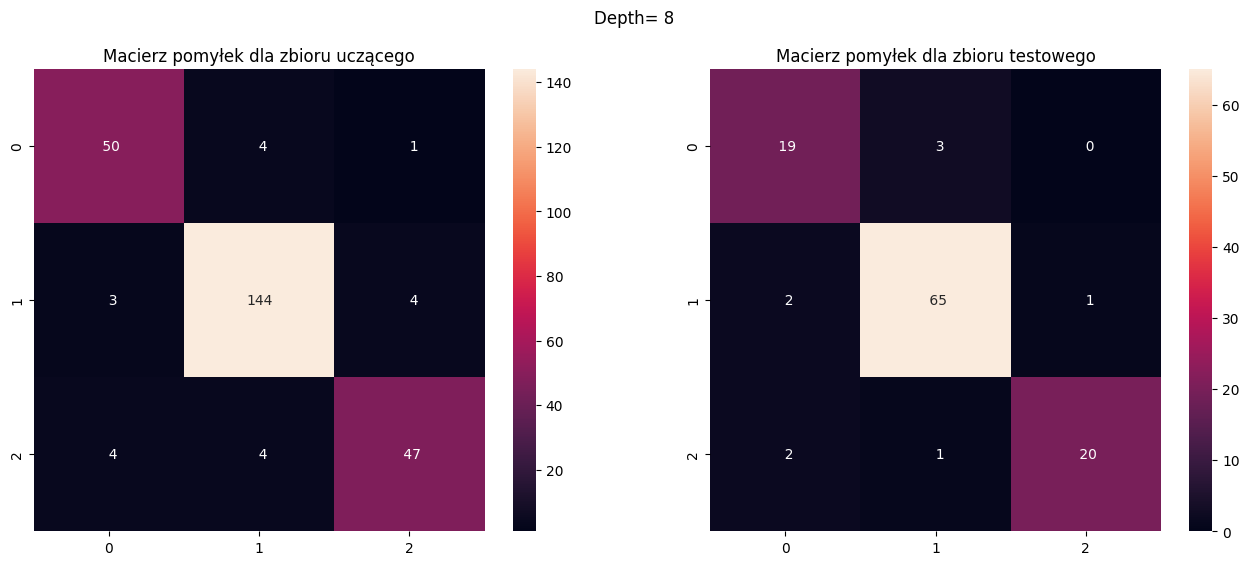

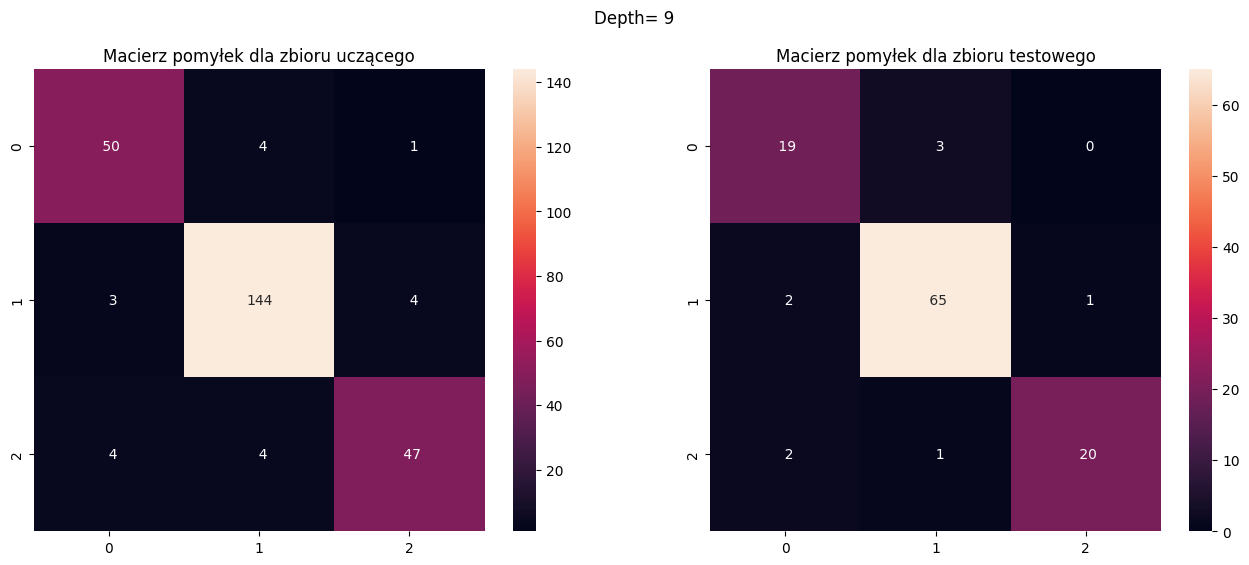

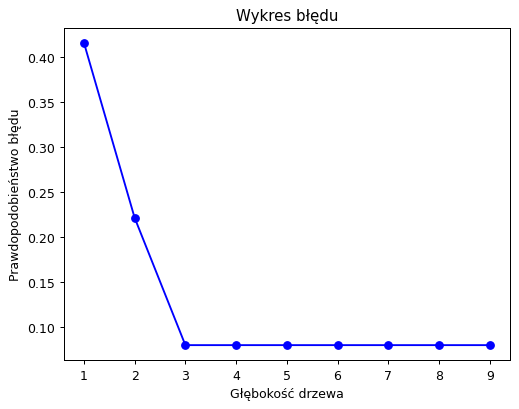

In [149]:

data = divide(d,0.3)
rss_tree=np.zeros(9)
model=tree.DecisionTreeClassifier(max_depth=1)
for i in range (1,10):
    model= tree.DecisionTreeClassifier(max_depth=i)
    matrix=weryfikuj(model,data,[0,1,2,3])
    rss_tree[i-1]=1-model.score(data["opis_test"],data["dec_test"])
    plt.figure(figsize=(16,6),dpi=100) 
    plt.subplot(1,2,1)
    sns.heatmap(matrix[0],annot=matrix[0],fmt="3d")
    plt.title("Macierz pomyłek dla zbioru uczącego")
    plt.subplot(1,2,2)
    sns.heatmap(matrix[1],annot=matrix[1],fmt="3d")
    plt.title("Macierz pomyłek dla zbioru testowego")  
    plt.suptitle("Depth= "+str(i)) 
errorChart(rss_tree,"Głębokość drzewa", "Prawdopodobieństwo błędu")

 

Optymalna głębokość wynosi 3. Klasyfikator uzyskuje wówczas skuteczność około 92% - tożsamą, do tej uzyskiwanej przez KNN.
Dla większych głębokości obserwujemy brak wzrostu skuteczności.